# <div class="alert alert-danger"> End to End Machine Learning Project (31.3.23) </div>

## Model Training

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Model Training

In [2]:
df_fire_cleaned = pd.read_csv('Algerian_forest_fires_cleaned.csv')

In [3]:
df_fire_cleaned.head()

,Unnamed: 0,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [4]:
df_fire_cleaned.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df_fire_cleaned.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [6]:
df_fire_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int64  
 11  Region       243 non-null    int64  
dtypes: float64(7), int64(5)
memory usage: 22.9 KB


In [7]:
df_fire_cleaned.describe().round(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,243.00,243.00,243.00,243.00,243.00,243.00,243.00,243.00,243.00,243.00,243.00,243.0
mean,32.15,62.04,15.49,0.76,77.84,14.68,49.43,4.74,16.69,7.04,0.56,0.5
std,3.63,14.83,2.81,2.00,14.35,12.39,47.67,4.15,14.23,7.44,0.50,0.5
min,22.00,21.00,6.00,0.00,28.60,0.70,6.90,0.00,1.10,0.00,0.00,0.0
25%,30.00,52.50,14.00,0.00,71.85,5.80,12.35,1.40,6.00,0.70,0.00,0.0
50%,32.00,63.00,15.00,0.00,83.30,11.30,33.10,3.50,12.40,4.20,1.00,0.0
75%,35.00,73.50,17.00,0.50,88.30,20.80,69.10,7.25,22.65,11.45,1.00,1.0
max,42.00,90.00,29.00,16.80,96.00,65.90,220.40,19.00,68.00,31.10,1.00,1.0


In [8]:
df_fire_cleaned.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

<div class="alert-danger">
Now for prediction we doesnt require day, month and year data because it is not related to or will take part in any calculus/prediction operations, hence we can remove it.
</div>

In [9]:
df_fire_cleaned.Classes.unique()

array([0, 1])

In [10]:
df_fire_cleaned.Classes.value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [11]:
df_fire_cleaned.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [12]:
df_fire_cleaned.corr('spearman').round(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.00,-0.64,-0.22,-0.29,0.67,0.61,0.51,0.65,0.59,0.66,0.52,0.25
RH,-0.64,1.00,0.20,0.18,-0.66,-0.50,-0.35,-0.64,-0.47,-0.60,-0.42,-0.39
Ws,-0.22,0.20,1.00,0.01,-0.07,0.00,0.06,0.03,0.03,0.03,-0.02,-0.15
Rain,-0.29,0.18,0.01,1.00,-0.74,-0.56,-0.61,-0.74,-0.58,-0.72,-0.68,-0.01
FFMC,0.67,-0.66,-0.07,-0.74,1.00,0.82,0.74,0.99,0.81,0.97,0.86,0.24
DMC,0.61,-0.50,0.00,-0.56,0.82,1.00,0.89,0.82,0.99,0.92,0.72,0.23
DC,0.51,-0.35,0.06,-0.61,0.74,0.89,1.00,0.75,0.94,0.85,0.67,-0.03
ISI,0.65,-0.64,0.03,-0.74,0.99,0.82,0.75,1.00,0.81,0.97,0.86,0.22
BUI,0.59,-0.47,0.03,-0.58,0.81,0.99,0.94,0.81,1.00,0.91,0.72,0.14
FWI,0.66,-0.60,0.03,-0.72,0.97,0.92,0.85,0.97,0.91,1.00,0.84,0.19


<AxesSubplot: >

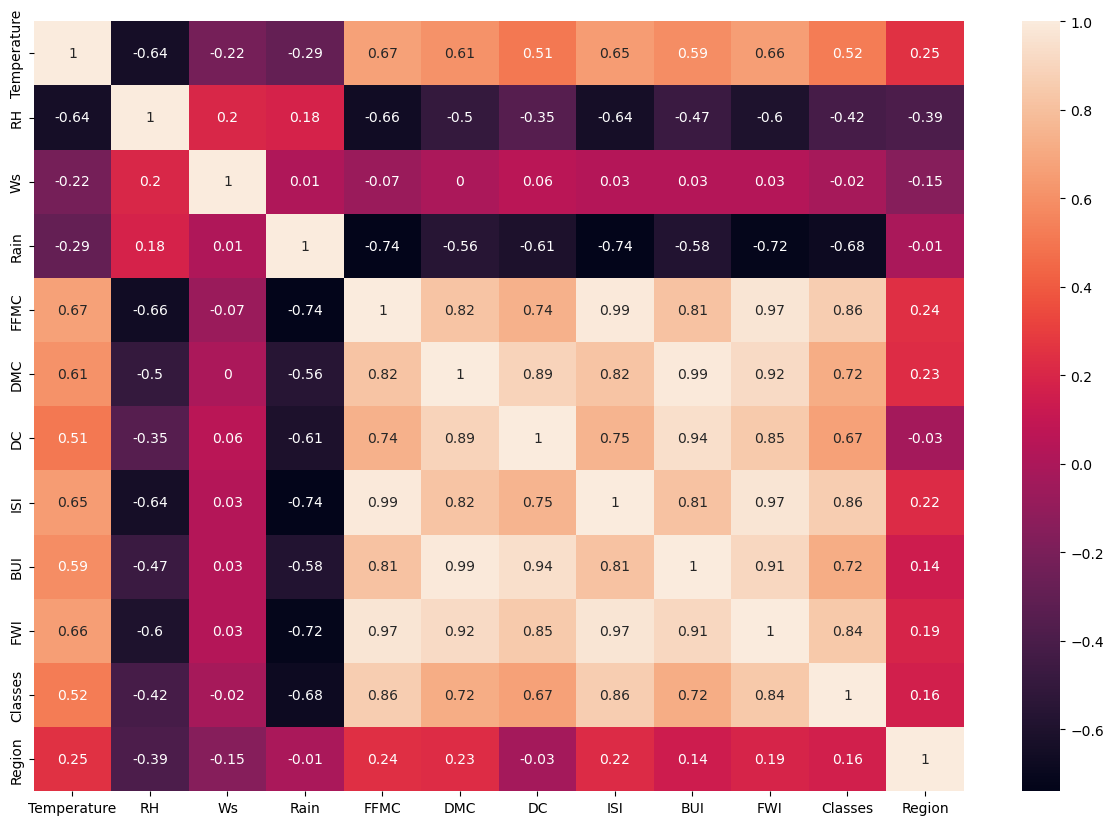

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(df_fire_cleaned.corr('spearman').round(2), annot=True)

# <div class = 'alert-warning'> Deciding Independent and dependent features </div>

In [14]:
X = df_fire_cleaned.drop(columns=['RH'],axis=1)
z = df_fire_cleaned['RH']

In [15]:
X

,Temperature,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [16]:
z

0      57
1      61
2      82
3      89
4      77
       ..
238    65
239    87
240    87
241    54
242    64
Name: RH, Length: 243, dtype: int64

In [17]:
#Train Test Split
from sklearn.model_selection import train_test_split

In [18]:
# Applying train_test_split on X (Featured Variables) and Z (Rain, Target Variable 1).


X_train,X_test,z_train,z_test=train_test_split(X,z,test_size=0.25,random_state=42)

In [19]:
X_train.shape,X_test.shape,z_train.shape,z_test.shape

((182, 11), (61, 11), (182,), (61,))

In [20]:
# Defining a function for selection of feature columns within dataset whose correlation is greater than threshold 
# with conditional formatting.

def correlation(dataset, threshold):
    col_corr = set() #creating a set for column storage
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [21]:
## threshold--Domain expertise
corr_features=correlation(X_train,0.85)

In [22]:
corr_features

{'BUI', 'DC', 'FWI'}

### <div class = 'alert-info'> You are correct that if two columns are highly correlated, it may make sense to keep one and remove the other. However, in some cases, both columns may be removed to avoid multicollinearity, which can cause issues in certain statistical models.</div> <div class = 'alert-warning'> Multicollinearity occurs when two or more predictor variables in a model are highly correlated with each other. This can cause problems when estimating the coefficients of the model, as it becomes difficult to determine the independent effect of each variable on the response variable. In other words, the model becomes unstable and the coefficients become imprecise.</div> <div class = 'alert-info'>In the case of BUI and DC, if they are highly correlated, it may make sense to remove both columns to avoid multicollinearity. By removing both columns, we can avoid the potential issues that may arise from including highly correlated variables in the model. Additionally, removing one variable and keeping the other may lead to loss of important information, especially if both variables are informative and contribute to the prediction of the response variable. </div>

### <div class = 'alert-danger'> The reason why the function skipped the correlation between BUI and DMC even though their correlation coefficient is 98.3175% (which is greater than the threshold of 0.85) is because the function only checks for correlations between pairs of columns once. In other words, it only checks the upper triangle of the correlation matrix and skips the lower triangle, assuming that the lower triangle is a mirror image of the upper triangle. In the case of BUI and DMC, their correlation coefficient is in the lower triangle of the correlation matrix, so the function did not detect their high correlation. To fix this issue, you can modify the function to check both the upper and lower triangles of the correlation matrix. </div>

In [23]:
## drop features when correlation is more than 0.85 
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((182, 8), (61, 8))

## Feature Scaling Or Standardization

In [24]:
X_train

,Temperature,Ws,Rain,FFMC,DMC,ISI,Classes,Region
97,29,19,0.1,75.8,3.6,2.1,0,0
141,31,14,0.2,60.2,3.8,0.8,0,1
192,40,15,0.0,94.2,22.5,16.6,1,1
68,32,18,0.3,77.1,11.3,2.2,0,0
119,32,14,0.7,77.5,7.1,1.8,0,0
...,...,...,...,...,...,...,...,...
106,24,15,0.4,44.9,0.9,0.2,0,0
14,28,17,3.1,49.4,3.0,0.4,0,0
92,25,17,7.2,46.0,1.3,0.2,0,0
179,34,16,0.0,88.1,19.5,7.4,1,1


In [25]:
X_test

,Temperature,Ws,Rain,FFMC,DMC,ISI,Classes,Region
24,31,15,0.0,86.7,14.2,5.7,1,0
6,33,13,0.0,88.2,9.9,6.4,1,0
152,28,18,2.2,63.7,3.2,1.2,0,1
232,34,13,0.2,79.5,18.7,2.1,0,1
238,30,14,0.0,85.4,16.0,4.5,1,1
...,...,...,...,...,...,...,...,...
162,34,15,2.9,74.8,7.1,1.6,0,1
178,33,16,0.0,87.5,15.7,6.7,1,1
224,31,14,0.0,84.2,8.3,3.8,1,1
230,36,13,0.1,90.6,25.8,9.0,1,1


In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

## For standardizing we use Z_Score formula on each column.

In [27]:
scaler.mean_

array([32.11538462, 15.57692308,  0.82087912, 77.63351648, 14.73626374,
        4.81978022,  0.54945055,  0.49450549])

In [28]:
for mean, column in zip(scaler.mean_, df_fire_cleaned.columns):
    print(f"The mean for column '{column}' is {mean:.2f} units.")

The mean for column 'Temperature' is 32.12 units.
The mean for column 'RH' is 15.58 units.
The mean for column 'Ws' is 0.82 units.
The mean for column 'Rain' is 77.63 units.
The mean for column 'FFMC' is 14.74 units.
The mean for column 'DMC' is 4.82 units.
The mean for column 'DC' is 0.55 units.
The mean for column 'ISI' is 0.49 units.


In [29]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns= X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns= X_train.columns)

In [30]:
X_train_scaled

,Temperature,Ws,Rain,FFMC,DMC,ISI,Classes,Region
0,-0.842842,1.299720,-0.337274,-0.128056,-0.882729,-0.629633,-1.104315,-0.989071
1,-0.301758,-0.598748,-0.290487,-1.217586,-0.866876,-0.930585,-1.104315,1.011050
2,2.133120,-0.219054,-0.384060,1.157031,0.615402,2.727139,0.905539,1.011050
3,-0.031216,0.920027,-0.243701,-0.037262,-0.272379,-0.606483,-1.104315,-0.989071
4,-0.031216,-0.598748,-0.056555,-0.009325,-0.605297,-0.699084,-1.104315,-0.989071
...,...,...,...,...,...,...,...,...
177,-2.195553,-0.219054,-0.196914,-2.286163,-1.096748,-1.069486,-1.104315,-0.989071
178,-1.113385,0.540333,1.066320,-1.971876,-0.930289,-1.023186,-1.104315,-0.989071
179,-1.925011,0.540333,2.984564,-2.209337,-1.065041,-1.069486,-1.104315,-0.989071
180,0.509868,0.160640,-0.384060,0.730997,0.377603,0.597325,0.905539,1.011050


In [31]:
X_test_scaled

,Temperature,Ws,Rain,FFMC,DMC,ISI,Classes,Region
0,-0.301758,-0.219054,-0.384060,0.633218,-0.042508,0.203772,0.905539,-0.989071
1,0.239326,-0.978441,-0.384060,0.737981,-0.383352,0.365823,0.905539,-0.989071
2,-1.113385,0.920027,0.645242,-0.973140,-0.914435,-0.837985,-1.104315,1.011050
3,0.509868,-0.978441,-0.290487,0.130358,0.314190,-0.629633,-1.104315,1.011050
4,-0.572300,-0.598748,-0.384060,0.542424,0.100172,-0.074030,0.905539,1.011050
...,...,...,...,...,...,...,...,...
56,0.509868,-0.219054,0.972747,-0.197897,-0.605297,-0.745384,-1.104315,1.011050
57,0.239326,0.160640,-0.384060,0.689092,0.076392,0.435274,0.905539,1.011050
58,-0.301758,-0.598748,-0.384060,0.458614,-0.510178,-0.236081,0.905539,1.011050
59,1.050952,-0.978441,-0.337274,0.905601,0.876980,0.967727,0.905539,1.011050


## Box Plots To understand Effect Of Standard Scaler

/tmp/ipykernel_99/1084184185.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'X_train After Scaling')

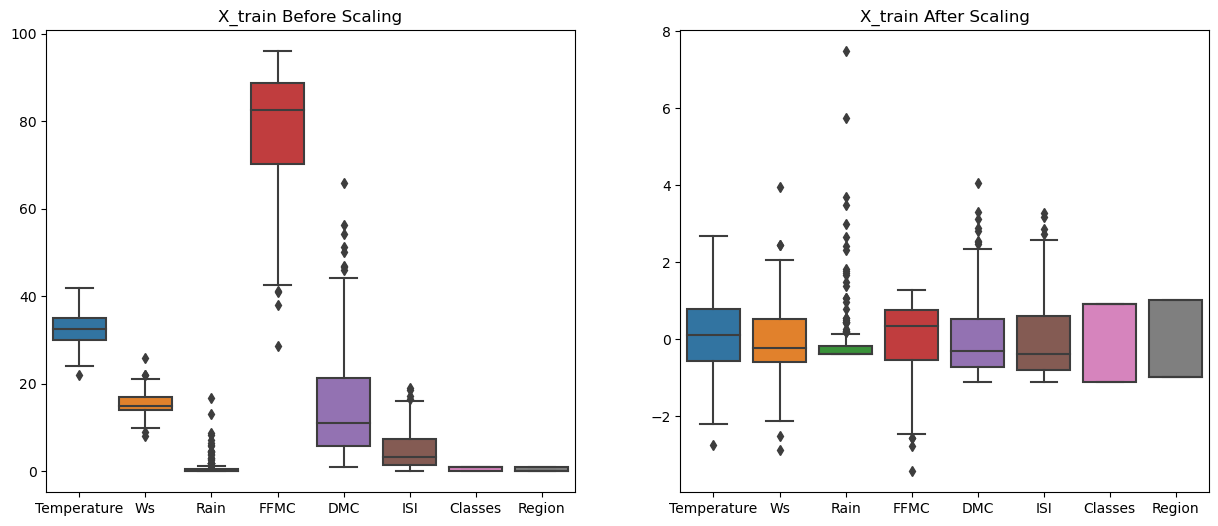

In [32]:
plt.subplots(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

/tmp/ipykernel_99/1787678597.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'X_test After Scaling')

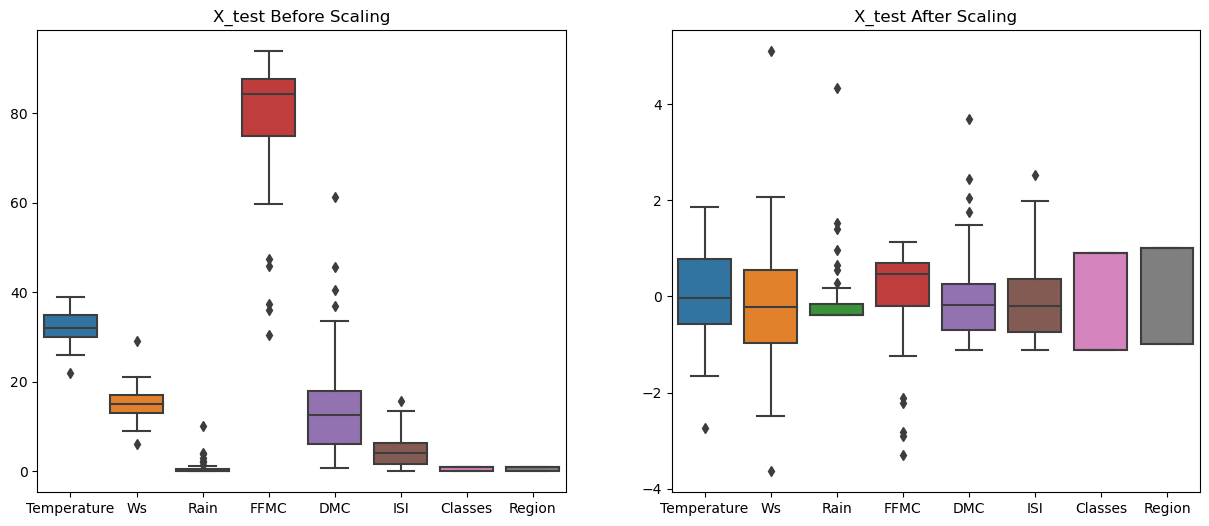

In [33]:
plt.subplots(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_test)
plt.title('X_test Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_test_scaled)
plt.title('X_test After Scaling')

## Linear Regression Model

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [70]:
# training the model for z

linear=LinearRegression()
linear.fit(X_train_scaled,z_train)

LinearRegression()

In [71]:
reg_z.coef_, reg_z.intercept_

(array([-3.05568472,  1.5643889 , -1.98486069, -6.15563243,  2.55601709,
        -9.80234446,  5.10396709, -2.00137632]),
 62.274725274725284)

In [72]:
# theoretical equation is as follows
equation = []
for coef, col in zip(linear.coef_, X_train_scaled.columns):
    a = f"{coef.round(2)} * {col}"
    equation.append(a)

Equation = f"{linear.intercept_.round(2)} + " + " + ".join(equation) 

In [73]:
Equation

'62.27 + -3.06 * Temperature + 1.56 * Ws + -1.98 * Rain + -6.16 * FFMC + 2.56 * DMC + -9.8 * ISI + 5.1 * Classes + -2.0 * Region'

In [74]:
# making the predictions

z_pred=reg_z.predict(X_test_scaled)
mae_zlinear=mean_absolute_error(z_test,z_pred)
score_zlinear=r2_score(z_test,z_pred)
print("Mean absolute error", mae_zlinear.round(2))
print("R2 Score", score_zlinear.round(2))

Mean absolute error 6.28
R2 Score 0.66


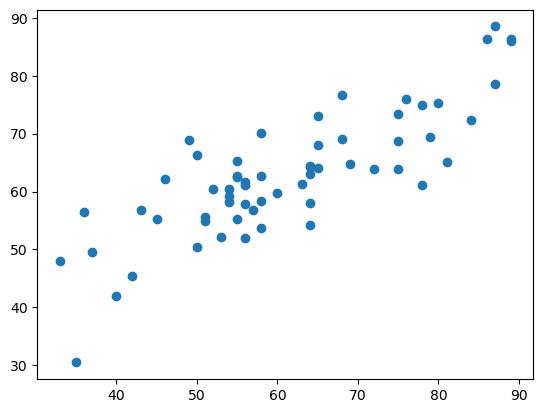

In [75]:
plt.scatter(z_test,z_pred)

In [76]:
z

0      57
1      61
2      82
3      89
4      77
       ..
238    65
239    87
240    87
241    54
242    64
Name: RH, Length: 243, dtype: int64

## Lasso Regression

In [77]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [78]:
lasso=Lasso()
lasso.fit(X_train_scaled,z_train)

Lasso()

In [79]:
z_pred=lasso.predict(X_test_scaled)
mae_zlasso=mean_absolute_error(z_test,z_pred)
score_zlasso=r2_score(z_test,z_pred)
print(f"Mean absolute error is {mae_zlasso:.2f}")
print(f"R2 Score is {score_zlasso:.2f}")

Mean absolute error is 8.00
R2 Score is 0.55


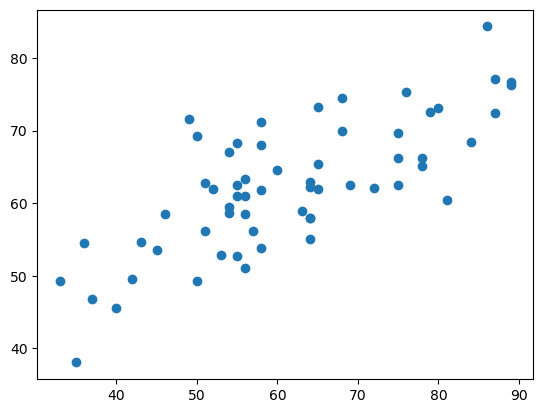

In [80]:
plt.scatter(z_test,z_pred)

### Cross Validation Lasso

In [81]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,z_train)

LassoCV(cv=5)

In [82]:
lassocv.alpha_

0.010747889330439546

Mean absolute error 6.29
R2 Score 0.66


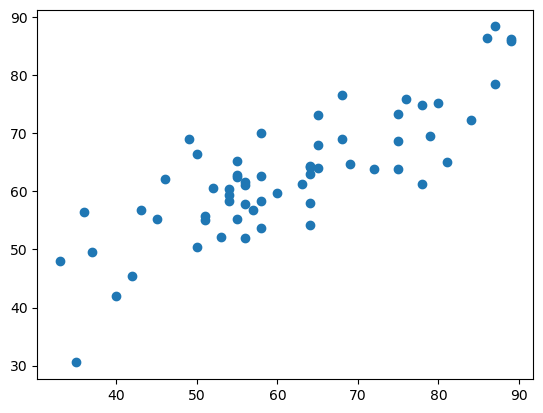

In [83]:
z_pred=lassocv.predict(X_test_scaled)
plt.scatter(z_test,z_pred)
mae_lcv=mean_absolute_error(z_test,z_pred)
score_lcv=r2_score(z_test,z_pred)
print("Mean absolute error", mae_lcv.round(2))
print("R2 Score", score_lcv.round(2))

## Ridge Regression model

In [84]:
from sklearn.linear_model import Ridge

In [85]:
ridge=Ridge()
ridge.fit(X_train_scaled,z_train)

Ridge()

In [86]:
y_pred = ridge.predict(X_test_scaled)

mae_ridge= mean_absolute_error(z_test,z_pred)
score_ridge = r2_score(z_test,z_pred)

print("Mean absolute error", mae_ridge.round(2))
print("R2 Score", score_ridge.round(2))

Mean absolute error 6.29
R2 Score 0.66


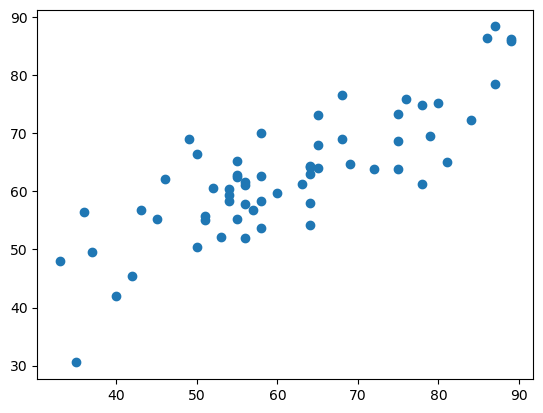

In [87]:
plt.scatter(z_test,z_pred)

In [88]:
from sklearn.linear_model import RidgeCV

In [89]:
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,z_train)

RidgeCV(cv=5)

In [90]:
y_pred=ridgecv.predict(X_test_scaled)

mae_ridgecv=mean_absolute_error(z_test,z_pred)
score_ridgecv=r2_score(z_test,z_pred)

print("Mean absolute error", mae_ridgecv.round(2))
print("R2 Score", score_ridgecv.round(2))

Mean absolute error 6.29
R2 Score 0.66


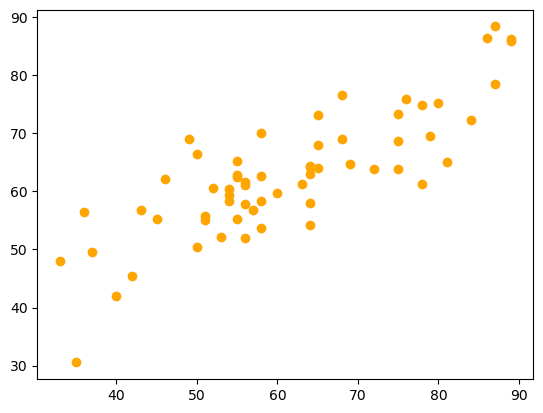

In [91]:
plt.scatter(z_test,z_pred, c = 'orange')

In [92]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

## Elasticnet Regression

In [93]:
from sklearn.linear_model import ElasticNet

In [94]:
elastic=ElasticNet()
elastic.fit(X_train_scaled,z_train)

ElasticNet()

In [95]:
y_pred=elastic.predict(X_test_scaled)

mae_enet=mean_absolute_error(z_test,z_pred)
score_enet=r2_score(z_test,z_pred)

print("Mean absolute error", mae_enet.round(2))
print("R2 Score", score_enet.round(2))

Mean absolute error 6.29
R2 Score 0.66


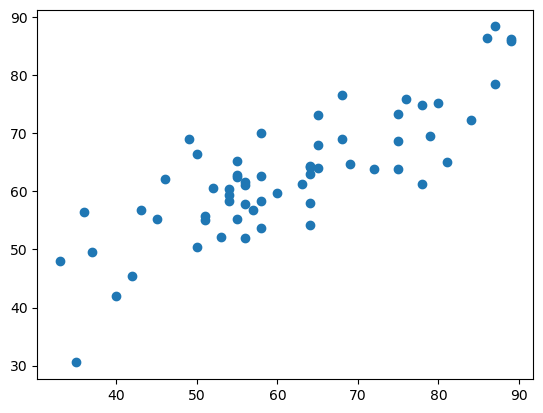

In [96]:
plt.scatter(z_test,z_pred)

In [97]:
from sklearn.linear_model import ElasticNetCV

In [98]:
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled,z_train)

ElasticNetCV(cv=5)

In [99]:
y_pred=elasticcv.predict(X_test_scaled)

mae_enet_cv=mean_absolute_error(z_test,z_pred)
score_enet_cv=r2_score(z_test,z_pred)

print("Mean absolute error", mae_enet_cv.round(2))
print("R2 Score", score_enet_cv.round(2))

Mean absolute error 6.29
R2 Score 0.66


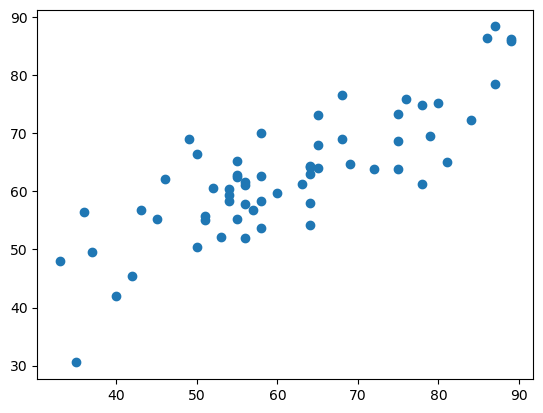

In [100]:
plt.scatter(z_test,z_pred)

## <div class = 'alert-success'> Pickling Machine Learning models , </div>

## <div class = 'alert-warning'> and Preprocessing model w.r.t. StandardScalers which has maximum R2 score against them.</div>

In [101]:
f"We have respective R2 score for Linear, Lasso, Ridge and Elastic net as follows {score_zlinear.round(2)}, {score_ridge.round(2)}, {score_zlasso.round(2)} and {score_enet.round(2)} repectively."

'We have respective R2 score for Linear, Lasso, Ridge and Elastic net as follows 0.66, 0.66, 0.55 and 0.66 repectively.'

<div class="alert-info">From above statement we can conclude that three regression models have maximum and same score so we pickle those models.<div/>

In [102]:
scaler

StandardScaler()

In [104]:
linear

LinearRegression()

In [105]:
lasso

Lasso()

In [106]:
elastic

ElasticNet()

In [107]:
import pickle

Signature:
pickle.dump(
    obj,
    file,
    protocol=None,
    *,
    fix_imports=True,
    buffer_callback=None,
)

Docstring:
Write a pickled representation of obj to the open file object file.

In [110]:
pickle.dump(scaler,open('scaler.pkl','wb')) # for standardizing data

# for prediction
pickle.dump(lasso,open('lasso.pkl','wb'))
pickle.dump(linear,open('linear.pkl','wb'))
pickle.dump(elastic,open('elastic.pkl','wb'))